In [19]:
import numpy as np
import sympy as sp
import pylab as plt
import scipy.constants as sci

In 2-D electron gas, the density of states is a constant for $E < E_F, 0$ otherwise:
$$n_{2D} = \frac{m}{\pi \hbar^2}$$
If we turn on the magnetic field B, the density of states of each Landau level is:
$$n_B = \frac{m \omega_c}{2\pi \hbar} = \frac{eB}{2\pi \hbar},$$
in which:
$$\omega_c = \frac{eB}{m}$$
each Landau level have the energy:
$$E_n  = \hbar \omega_c \bigg(n+ \frac{1}{2} \bigg) = \hbar \frac{eB}{m} \bigg(n+ \frac{1}{2} \bigg)$$

In [20]:
EF = sci.hbar*sci.e*2/sci.m_e*7./2.
DOS2d = sci.m_e/(sci.pi*sci.hbar**2)
def Landau(n,Bl ,k):
    return (sci.hbar*sci.e * Bl * (n+1./2.)) / (sci.m_e)
print(sci.hbar*sci.e*2/sci.m_e*7./2.*DOS2d)

3385184938918885.0


Assuming that from begining, the system have $N_e$ electrons inside a rectangular box with area A. Fermi energy will be
$$E_F = \frac{N_e}{A n_{2D}}= \frac{N_e \pi \hbar^2}{Am_e}$$
$\nu$ Landau level can accomodate:
$$\nu \frac{eAB}{2\pi \hbar}$$
eletrons. Therefore total number of Landau level under Fermi level will be:
$$\nu_r  = mod(N_e,\frac{eAB}{2\pi \hbar})$$

In [21]:
Ne = 2e5
A = 1e-10 #m^2
EF = Ne * np.pi * sci.hbar**2. / (sci.m_e * A)

E = np.linspace(0, EF*2, 2000)
nu_r = Ne // (sci.e*A*4/sci.h)
print("At B = 4T, nu_r = ", nu_r)
B = np.array([4, 2, 1])
Bni = np.linspace(4, 1.9, 2000)
n = np.arange(0,2)

At B = 4T, nu_r =  2.0


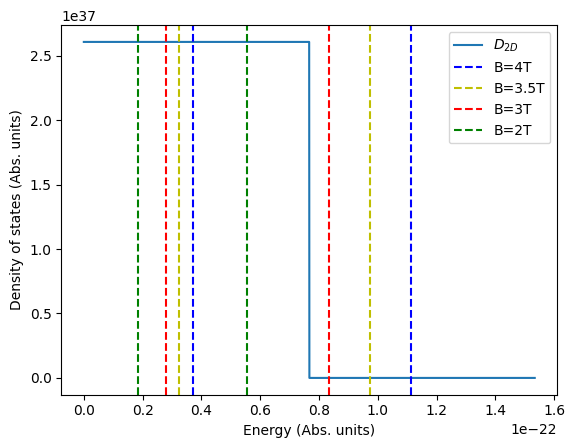

In [27]:
plt.plot(E, DOS2d*(1.-np.heaviside(E - EF,0)), label='$D_{2D}$')
for i in range(len(n)):
    plt.axvline(x=Landau(n[i], B[0], 0), color='b', linestyle='--', label=f'B={B[0]}T' if i == 0 else '')
    plt.axvline(x=Landau(n[i], 3.5, 0), color='y', linestyle='--', label='B=3.5T' if i == 0 else '')
    plt.axvline(x=Landau(n[i], 3, 0), color='r', linestyle='--', label='B=3T' if i == 0 else '')
    plt.axvline(x=Landau(n[i], B[1], 0), color='g', linestyle='--', label=f'B={B[1]}T' if i == 0 else '')
plt.legend()
plt.xlabel('Energy (Abs. units)')
plt.ylabel('Density of states (Abs. units)')
plt.savefig('images/decreseB.png')
plt.show()


As we can see, the red line

We will investigating the change of electron contribute into the 

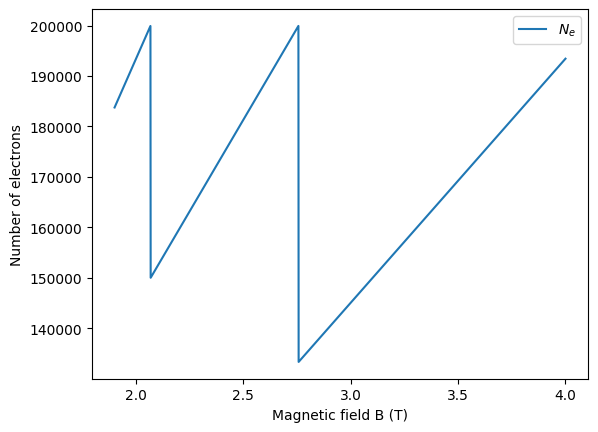

In [23]:
nu_rr = Ne // (sci.e*A*Bni/sci.h)
Nee = nu_rr * (sci.e*A*Bni/sci.h)
plt.plot(Bni, Nee, label='$N_e$')
plt.ylabel('Number of electrons')
plt.xlabel('Magnetic field B (T)')
plt.legend()
plt.savefig('images/Ne.png')

In [24]:
print("Total number of electron under Fermi energy at")
print("4T", 1*(sci.e*A*4/sci.h))
print("2T", 2*(sci.e*A*2/sci.h))
print("3T", 1*(sci.e*A*3.5/sci.h))

Total number of electron under Fermi energy at
4T 96719.56968339674
2T 96719.56968339674
3T 84629.62347297215
